<a href="https://colab.research.google.com/github/poomshift/WebUI-Forge-Colab-Alchemist/blob/main/WebUI_Forge_Colab_Alchemist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

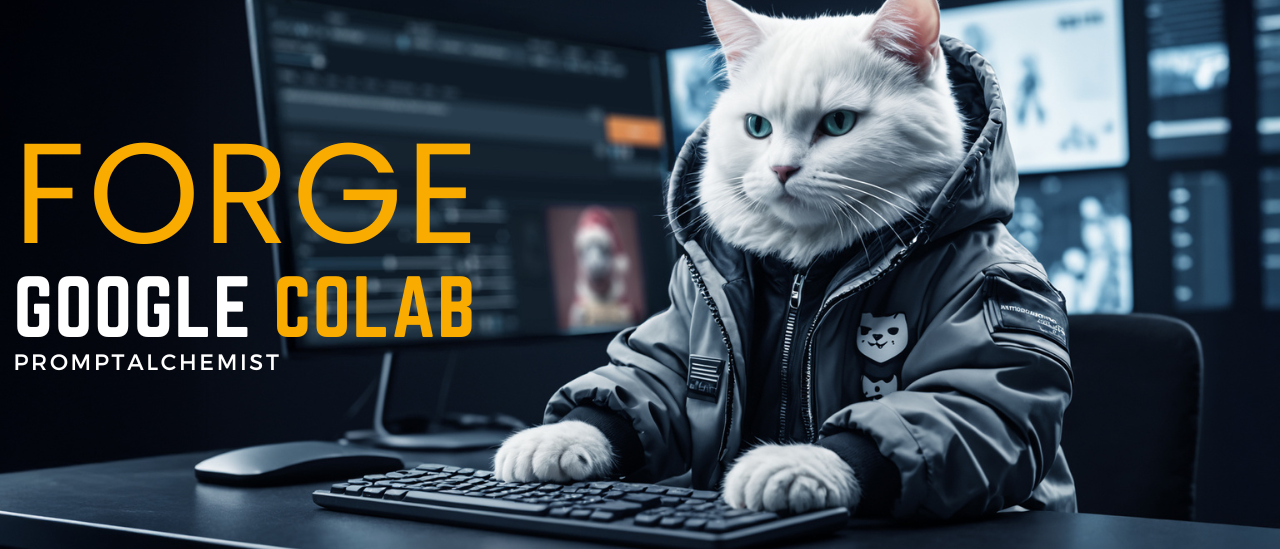

📢 พื้นที่ประกาศกิจกรรม


##Prompt Alchemist’s WebUI Forge Colab
📢 พบปัญหาการใช้งาน กรุณาแจ้งมาที่ [Facebook/promptalchemist](https://www.facebook.com/PromptAlchemist)


📝 สมัคร [Google Colab Pro](https://colab.research.google.com/signup)

>ราคา 343฿ ต่อเดือน ได้รับ 100 computing units

>การใช้งานประมาณ 1.67 units/hr = ชั่วโมงละ 5.7฿

📃 [คู่มือการใช้งาน](https://www.alchemistskill.com/how-to-use-webui-forge-in-google-colab/) | [Manual](https://www.alchemistskill.com/webui-forge-colab-tutorial-use-flux-model-in-webui/)

📹 [วีดีโอสอนการใช้งาน](https://www.youtube.com/watch?v=4X5w3NjoXaw) | [Video Tutorial](https://www.youtube.com/watch?v=FDs4z0xmkkY)

🖼️ ไฟล์ภาพจะถูกเซฟไว้ที่ Google Drive MyDrive/Forge_output

บรรยาย In-house สนใจติดต่อ [Facebook/promptalchemist](https://www.facebook.com/PromptAlchemist)

ถ้าต้องการใช้ LoRA และ Chackpoint จาก Google Drive ให้สร้างโฟเดอร์

"Lora" , "Checkpoint"

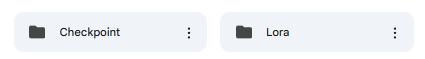

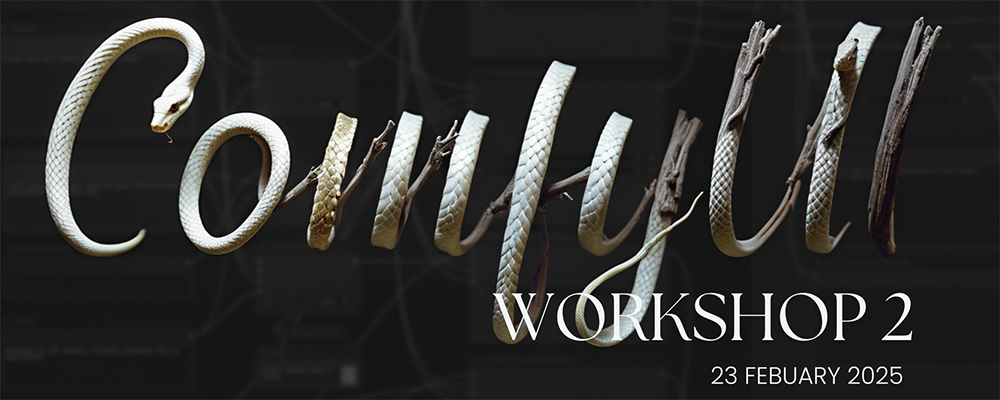

Workshop ComfyUI รุ่นที่ 2 |
วันอาทิตย์ที่ 23 กุมภาพันธ์ 2025 |
🎉 พิเศษ! Early Bird ลดเหลือ 3,990.- เท่านั้น (จาก 4,990.-)

⏰ จองด่วน! ภายในวันที่ 31 มกราคม 2025 นี้ รายละเอียดเพิ่มเติม www.alchemistskill.com/comfyui-workshop-2/

In [ ]:
#@markdown #1. 📦 Install WebUI Forge | Models (3-4 นาที)

from IPython.display import clear_output
from IPython.display import Javascript
import ipywidgets as widgets
from google.colab import drive
import os
from google.colab import output
import subprocess
import sys


output.enable_custom_widget_manager()

display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))
def inf(msg, style, wdth): inf = widgets.Button(description=msg, disabled=True, button_style=style, layout=widgets.Layout(min_width=wdth));display(inf)

%cd /content
drive.mount('/content/drive')



#ติดตั้ง WebUI Forge
!git clone https://github.com/lllyasviel/stable-diffusion-webui-forge

#ติดตั้ง Dependencies
%cd /content/stable-diffusion-webui-forge
!apt -y install -qq aria2
!pip install xformers!=0.0.18 torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu121
# !pip install -r requirements_versions.txt

def install_requirements(requirements_file):
    # Install packages without asking for restart
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', '-q', '-r', requirements_file])

# Usage
install_requirements('requirements_versions.txt')

#Extension
!git clone https://github.com/zanllp/sd-webui-infinite-image-browsing /content/stable-diffusion-webui-forge/extensions/sd-webui-infinite-image-browsing
!git clone https://github.com/Coyote-A/ultimate-upscale-for-automatic1111 /content/stable-diffusion-webui-forge/extensions/ultimateSD
# !git clone https://github.com/BlafKing/sd-civitai-browser-plus /content/stable-diffusion-webui-forge/extensions/sd-civitai-browser-plus
!git clone https://github.com/Gourieff/sd-webui-reactor-sfw /content/stable-diffusion-webui-forge/extensions/sd-webui-reactor-sfw

%cd /content/stable-diffusion-webui-forge/extensions/sd-webui-infinite-image-browsing
!pip install -r requirements.txt

%cd /content/stable-diffusion-webui-forge/extensions/sd-webui-reactor-sfw
!pip install -r requirements.txt


%cd /content/stable-diffusion-webui-forge

# Define the file path and content
file_path = '/content/stable-diffusion-webui-forge/config.json'
config_content = '''
{
  "outdir_samples": "",
  "outdir_txt2img_samples": "/content/drive/MyDrive/Forge_output/text",
  "outdir_img2img_samples": "/content/drive/MyDrive/Forge_output/image",
  "outdir_extras_samples": "/content/drive/MyDrive/Forge_output/extras",
  "outdir_grids": "",
  "outdir_txt2img_grids": "/content/drive/MyDrive/Forge_output/grids",
  "outdir_img2img_grids": "/content/drive/MyDrive/Forge_output/grids",
  "outdir_save": "/content/drive/MyDrive/Forge_output/save",
  "outdir_init_images": "/content/drive/MyDrive/Forge_output/init-images"
}
'''
# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(file_path), exist_ok=True)

# Write the config file
with open(file_path, 'w') as config_file:
    config_file.write(config_content)

!mkdir -p /content/stable-diffusion-webui-forge/models/ControlNet
!mkdir -p /content/stable-diffusion-webui-forge/models/Lora

#ESRGAN
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/embed/upscale/resolve/main/4x-UltraSharp.pth -d /content/stable-diffusion-webui-forge/models/ESRGAN -o 4x-UltraSharp.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/uwg/upscaler/resolve/main/ESRGAN/8x_NMKD-Superscale_150000_G.pth -d /content/stable-diffusion-webui-forge/models/ESRGAN -o 8x_NMKD-Superscale_150000_G.pth

#Flux VAE, Clip
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M -c https://huggingface.co/black-forest-labs/FLUX.1-schnell/resolve/main/ae.safetensors -d /content/stable-diffusion-webui-forge/models/VAE -o ae.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M -c https://huggingface.co/comfyanonymous/flux_text_encoders/resolve/main/clip_l.safetensors -d /content/stable-diffusion-webui-forge/models/text_encoder -o clip_l.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M -c https://huggingface.co/comfyanonymous/flux_text_encoders/resolve/main/t5xxl_fp8_e4m3fn.safetensors -d /content/stable-diffusion-webui-forge/models/text_encoder -o t5xxl_fp8_e4m3fn.safetensors

#@markdown Checkpoints เริ่มต้น
# Model configurations - Easy to add new models here
MODEL_CONFIGS = {

    "Majicmix Realistic SD15": {
        "url": "https://civitai.com/api/download/models/176425",
        "dir": "Stable-diffusion",
        "filename": None  # Let Civitai set the filename
    },
    "LEOSAM HelloWorld XL V7": {
        "url": "https://civitai.com/api/download/models/570138",
        "dir": "Stable-diffusion",
        "filename": None  # Let Civitai set the filename
    },
    "PonyDiffusion V6 XL": {
        "url": "https://huggingface.co/Magamanny/Pony-Diffusion-V6-XL/resolve/main/ponyDiffusionV6XL_v6StartWithThisOne.safetensors",
        "dir": "Stable-diffusion",
        "filename": "PonyDiffusionV6XL.safetensors"
    },
    "Juggernaut XL": {
        "url": "https://huggingface.co/Patarapoom/model/resolve/main/juggernautXL_juggXIByRundiffusion.safetensors",
        "dir": "Stable-diffusion",
        "filename": "juggernautXL.safetensors"
    },
    "Flux1 Dev Fp8": {
        "url": "https://huggingface.co/Kijai/flux-fp8/resolve/main/flux1-dev-fp8.safetensors",
        "dir": "Stable-diffusion",
        "filename": "flux1-dev-fp8.safetensors"
    },
    "Flux1 Dev Q5 GGUF": {
        "url": "https://huggingface.co/city96/FLUX.1-dev-gguf/resolve/main/flux1-dev-Q5_0.gguf",
        "dir": "Stable-diffusion",
        "filename": "flux1-dev-Q5_0.gguf"
    },
    "Shuttle 3 Diffusion Q4 GGUF (FLUX 4 STEPS)": {
        "url": "https://huggingface.co/shuttleai/shuttle-3-diffusion-GGUF/resolve/main/shuttle-3-diffusion-Q4_K_S.gguf",
        "dir": "Stable-diffusion",
        "filename": "shuttle-3-diffusion-Q4_K_S.gguf"
    },
    "STOIQO NewReality Flux": {
        "url": "https://huggingface.co/Patarapoom/model/resolve/main/stoiqoNewrealityFLUXSD35_f1DAlphaTwo.safetensors",
        "dir": "Stable-diffusion",
        "filename": "STOIQO_NewReality_Flux.safetensors"
    },
    "STOIQO Afrodite Flux (18+)": {
        "url": "https://huggingface.co/Patarapoom/model/resolve/main/STOIQOAfroditeFLUXXL_F1DAlpha.safetensors",
        "dir": "Stable-diffusion",
        "filename": "STOIQO_Afrodite_FLUX.safetensors"
    },

}


# Create the dropdowns
Model_1 = "None" #@param ["None", "Majicmix Realistic SD15", "LEOSAM HelloWorld XL V7", "PonyDiffusion V6 XL", "Juggernaut XL", "Flux1 Dev Fp8", "Flux1 Dev Q5 GGUF", "Shuttle 3 Diffusion Q4 GGUF (FLUX 4 STEPS)", "STOIQO NewReality Flux", "STOIQO Afrodite Flux (18+)"]
Model_2 = "Juggernaut XL" #@param ["None", "Majicmix Realistic SD15", "LEOSAM HelloWorld XL V7", "PonyDiffusion V6 XL", "Juggernaut XL", "Flux1 Dev Fp8", "Flux1 Dev Q5 GGUF", "Shuttle 3 Diffusion Q4 GGUF (FLUX 4 STEPS)", "STOIQO NewReality Flux", "STOIQO Afrodite Flux (18+)"]
Model_3 = "Shuttle 3 Diffusion Q4 GGUF (FLUX 4 STEPS)" #@param ["None","Majicmix Realistic SD15", "LEOSAM HelloWorld XL V7", "PonyDiffusion V6 XL", "Juggernaut XL", "Flux1 Dev Fp8", "Flux1 Dev Q5 GGUF", "Shuttle 3 Diffusion Q4 GGUF (FLUX 4 STEPS)", "STOIQO NewReality Flux","STOIQO Afrodite Flux (18+)"]



def download_file(url, base_dir, filename=None):
    """Download a single file using aria2c"""
    output_dir = f"/content/stable-diffusion-webui-forge/models/{base_dir}"
    filename_param = f"-o {filename}" if filename else ""
    command = f'aria2c --console-log-level=error -c -x 8 -s 8 -k 1M "{url}" -d "{output_dir}" {filename_param}'
    !{command}

def download_model(model_name):
    """Download model based on configuration"""
    if model_name == "None":
        return

    print(f"\nDownloading {model_name}...")
    config = MODEL_CONFIGS.get(model_name)

    if not config:
        print(f"Error: Configuration not found for {model_name}")
        return

    if "files" in config:  # Multiple files (like SD3.5)
        for file_config in config["files"]:
            download_file(file_config["url"], file_config["dir"], file_config["filename"])
    else:  # Single file
        download_file(config["url"], config["dir"], config.get("filename"))

print("Starting downloads...")

# Process selected models
for model_choice in [Model_1, Model_2, Model_3]:
    download_model(model_choice)

print("\nDownload process completed!")


#@markdown Controlnets and Ip-adapter
SD15_Controlnets_and_Ip_adapter = False # @param {type:"boolean"}
if SD15_Controlnets_and_Ip_adapter == True:
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11f1p_sd15_depth_fp16.safetensors -d /content/stable-diffusion-webui-forge/models/ControlNet -o control_v11p_sd15_depth_fp16.safetensors
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11f1e_sd15_tile_fp16.safetensors -d /content/stable-diffusion-webui-forge/models/ControlNet -o control_v11f1e_sd15_tile_fp16.safetensors
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_canny_fp16.safetensors -d /content/stable-diffusion-webui-forge/models/ControlNet -o control_v11p_sd15_canny_fp16.safetensors
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_inpaint_fp16.safetensors -d /content/stable-diffusion-webui-forge/models/ControlNet -o control_v11p_sd15_inpaint_fp16.safetensors
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_lineart_fp16.safetensors -d /content/stable-diffusion-webui-forge/models/ControlNet -o control_v11p_sd15_lineart_fp16.safetensors
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_mlsd_fp16.safetensors -d /content/stable-diffusion-webui-forge/models/ControlNet -o control_v11p_sd15_mlsd_fp16.safetensors
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_normalbae_fp16.safetensors -d /content/stable-diffusion-webui-forge/models/ControlNet -o control_v11p_sd15_normalbae_fp16.safetensors
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_openpose_fp16.safetensors -d /content/stable-diffusion-webui-forge/models/ControlNet -o control_v11p_sd15_openpose_fp16.safetensors
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_scribble_fp16.safetensors -d /content/stable-diffusion-webui-forge/models/ControlNet -o control_v11p_sd15_scribble_fp16.safetensors
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_seg_fp16.safetensors -d /content/stable-diffusion-webui-forge/models/ControlNet -o control_v11p_sd15_seg_fp16.safetensors
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_softedge_fp16.safetensors -d /content/stable-diffusion-webui-forge/models/ControlNet -o control_v11p_sd15_softedge_fp16.safetensors
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15s2_lineart_anime_fp16.safetensors -d /content/stable-diffusion-webui-forge/models/ControlNet -o control_v11p_sd15s2_lineart_anime_fp16.safetensors
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/monster-labs/control_v1p_sd15_qrcode_monster/resolve/main/control_v1p_sd15_qrcode_monster.safetensors -d /content/stable-diffusion-webui-forge/models/ControlNet -o control_v1p_sd15_qrcode_monster.safetensors
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/monster-labs/control_v1p_sd15_qrcode_monster/resolve/main/control_v1p_sd15_qrcode_monster.yaml -d /content/stable-diffusion-webui-forge/models/ControlNet -o control_v1p_sd15_qrcode_monster.yaml
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/h94/IP-Adapter/resolve/main/models/ip-adapter-plus_sd15.bin -d /content/stable-diffusion-webui-forge/models/ControlNet -o ip-adapter-plus_sd15.pth

else:
  ()

SDXL_Controlnets_and_Ip_adapter = True # @param {type:"boolean"}
if SDXL_Controlnets_and_Ip_adapter == True:
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/xinsir/controlnet-canny-sdxl-1.0/resolve/main/diffusion_pytorch_model_V2.safetensors -d /content/stable-diffusion-webui-forge/models/ControlNet -o controlnet-canny-sdxl.safetensors
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/xinsir/controlnet-depth-sdxl-1.0/resolve/main/diffusion_pytorch_model.safetensors -d /content/stable-diffusion-webui-forge/models/ControlNet -o controlnet-depth-sdxl.safetensors
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/xinsir/controlnet-openpose-sdxl-1.0/resolve/main/diffusion_pytorch_model.safetensors -d /content/stable-diffusion-webui-forge/models/ControlNet -o controlnet-openpose-sdxl.safetensors
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/xinsir/controlnet-scribble-sdxl-1.0/resolve/main/diffusion_pytorch_model.safetensors -d /content/stable-diffusion-webui-forge/models/ControlNet -o controlnet-scribble-sdxl.safetensors
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/bdsqlsz/qinglong_controlnet-lllite/resolve/main/bdsqlsz_controlllite_xl_mlsd_V2.safetensors -d /content/stable-diffusion-webui-forge/models/ControlNet -o controlllite_xl_mlsd.safetensors
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/h94/IP-Adapter/resolve/main/sdxl_models/ip-adapter-plus_sdxl_vit-h.safetensors -d /content/stable-diffusion-webui-forge/models/ControlNet -o ip-adapter-plus_sdxl_vit-h.safetensors
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/xinsir/controlnet-tile-sdxl-1.0/resolve/main/diffusion_pytorch_model.safetensors -d /content/stable-diffusion-webui-forge/models/ControlNet -o controlnet-tile-sdxl.safetensors


else:
  ()

#moodeng
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/Patarapoom/model/resolve/main/MooDeng-baby-hippo-flux.safetensors -d /content/stable-diffusion-webui-forge/models/Lora -o MooDeng-baby-hippo-flux.safetensors

!cp -av /content/drive/MyDrive/Lora/* /content/stable-diffusion-webui-forge/models/Lora
!cp -av /content/drive/MyDrive/Checkpoint/* /content/stable-diffusion-webui-forge/models/Stable-diffusion

# #cloudflare tunnel
# !wget https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64.deb
# !dpkg -i cloudflared-linux-amd64.deb

inf('\u2714 Complete','success', '50px')

In [ ]:
#@markdown #2. Run WebUI Forge
%cd /content/stable-diffusion-webui-forge
import subprocess
import threading
import time
import socket
from IPython.display import clear_output
from IPython.display import Javascript
import ipywidgets as widgets

# Set up display
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))


# Launch WebUI with Gradio share
!python launch.py --listen --share --port 7860 --api

#🔧Tools (Install ComfyUI first!!)

In [ ]:
from IPython.display import clear_output, Javascript
import ipywidgets as widgets
import subprocess
import os

def check_aria2c():
    """Check if aria2c is installed"""
    try:
        subprocess.run(['aria2c', '--version'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        return True
    except FileNotFoundError:
        return False

def install_aria2c():
    """Install aria2c using apt-get"""
    print("Installing aria2c...")
    !apt-get update -qq
    !apt-get install -y -qq aria2
    print("aria2c installed successfully!")

def setup_display():
    """Setup display configurations"""
    display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 200})'''))

def inf(msg, style, wdth):
    """Display info button"""
    inf = widgets.Button(
        description=msg,
        disabled=True,
        button_style=style,
        layout=widgets.Layout(min_width=wdth)
    )
    display(inf)

def download_model(api_key, model_type, model_id):
    """Download model from Civitai"""
    if not api_key.strip():
        print("Error: Please provide a Civitai API key")
        return

    if not model_id.strip():
        print("Error: Please provide a Model ID")
        return

    # Check if the models directory exists
    model_dir = f"/content/stable-diffusion-webui-forge/models/{model_type}"
    if not os.path.exists(model_dir):
        os.makedirs(model_dir, exist_ok=True)
        print(f"Created directory: {model_dir}")

    # Construct the URL
    url = f"https://civitai.com/api/download/models/{model_id}"

    # Construct the download command
    download_command = f'aria2c --console-log-level=error -c -x 16 -s 16 -k 1M "{url}?token={api_key}" -d "{model_dir}"'

    # Execute the download command
    print("Starting download...")
    !{download_command}
    print("Download completed!")

# Main execution
setup_display()

#@markdown #🤖 Civitai downloader
#@markdown Civitai API Key From https://civitai.com/user/account
#Civitai API
Civitai_API_key = "" #@param {type:"string"}
Model_type = "Stable-diffusion" # @param ["Stable-diffusion", "Lora", "ControlNet", "VAE", "text_encoder"]
Model_ID = "" #@param {type:"string"}

# Check and install aria2c if needed
if not check_aria2c():
    print("aria2c is not installed.")
    install_aria2c()
    if not check_aria2c():
        print("Error: Failed to install aria2c")
        exit(1)
    else:
        print("aria2c installation verified.")

# Process the download
download_model(Civitai_API_key, Model_type, Model_ID)

In [ ]:
from IPython.display import clear_output, Javascript
import ipywidgets as widgets
import subprocess
import os

def check_aria2c():
    """Check if aria2c is installed"""
    try:
        subprocess.run(['aria2c', '--version'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        return True
    except FileNotFoundError:
        return False

def install_aria2c():
    """Install aria2c using apt-get"""
    print("Installing aria2c...")
    !apt-get update -qq
    !apt-get install -y -qq aria2
    print("aria2c installed successfully!")

def setup_display():
    """Setup display configurations"""
    display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 200})'''))

def download_model(file_url, model_type):
    """Download single file from Hugging Face"""
    if not file_url.strip():
        print("Error: Please provide a file URL")
        return

    # Extract filename from URL
    filename = file_url.split('/')[-1]

    # Check if the models directory exists
    model_dir = f"/content/stable-diffusion-webui-forge/models/{model_type}"
    if not os.path.exists(model_dir):
        os.makedirs(model_dir, exist_ok=True)
        print(f"Created directory: {model_dir}")

    # Construct the download command
    download_command = f'aria2c --console-log-level=error -c -x 8 -s 8 -k 1M "{file_url}" -d "{model_dir}" -o "{filename}"'

    # Execute the download command
    print(f"Starting download of {filename}...")
    !{download_command}
    print("Download completed!")

# Main execution
setup_display()

#@markdown # 🤗 Hugging Face File Downloader
#@markdown File URL (e.g., https://huggingface.co/Kijai/flux-fp8/resolve/main/flux1-dev-fp8.safetensors)
File_URL = "" #@param {type:"string"}
Model_Type = "Stable-diffusion" # @param ["Stable-diffusion", "Lora", "ControlNet", "VAE", "text_encoder"]

# Check and install aria2c if needed
if not check_aria2c():
    print("aria2c is not installed.")
    install_aria2c()
    if not check_aria2c():
        print("Error: Failed to install aria2c")
        exit(1)
    else:
        print("aria2c installation verified.")

# Process the download
download_model(File_URL, Model_Type)